<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Line Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on using line charts to analyze trends over time and across different categories in a dataset.



## Objectives


In this lab you will perform the following:


- Track trends in compensation across age groups and specific age ranges.

- Analyze job satisfaction trends based on experience level.

- Explore and interpret line charts to identify patterns and trends.


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas
!pip install numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 178.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 192.3 MB/s eta 0:00:00


In [2]:
!pip install seaborn
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 135.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 144.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 152.6 MB/s eta 0:00:00


**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



#### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv


--2025-11-22 20:09:35--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  21.1MB/s    in 15s     

2025-11-22 20:09:51 (9.97 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



#### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")


#### Display the first few rows to understand the structure of the data


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Trends in Compensation Over Age Groups


##### 1. Line Chart of Median `ConvertedCompYearly` by Age Group


- Track how the median yearly compensation (ConvertedCompYearly) changes across different age groups.

- Use a line chart to visualize these trends.


In [7]:
#I need to find the median_comp for each for the age groups
#I calculate each age group's median group and assign it to a dict,
#convert the dict to a df and plot this new df.


In [8]:

age_groups = df['Age'].unique()
age_groups

array(['Under 18 years old', '35-44 years old', '45-54 years old',
       '18-24 years old', '25-34 years old', '55-64 years old',
       'Prefer not to say', '65 years or older'], dtype=object)

In [9]:
comp_dict = {}
comp_list = []
for age in age_groups:
    new_df = df[df['Age']==age]
    median=new_df['ConvertedCompYearly'].median()
    comp_list.append(median)

comp_list

[np.float64(7626.5),
 np.float64(84796.0),
 np.float64(99099.0),
 np.float64(25000.0),
 np.float64(59825.0),
 np.float64(109691.0),
 np.float64(140000.0),
 np.float64(106000.0)]

In [10]:
i = 0
for age in age_groups:
    comp_dict[age]=comp_list[i]
    i +=1

comp_dict

{'Under 18 years old': np.float64(7626.5),
 '35-44 years old': np.float64(84796.0),
 '45-54 years old': np.float64(99099.0),
 '18-24 years old': np.float64(25000.0),
 '25-34 years old': np.float64(59825.0),
 '55-64 years old': np.float64(109691.0),
 'Prefer not to say': np.float64(140000.0),
 '65 years or older': np.float64(106000.0)}

In [11]:
df2 = pd.DataFrame(list(comp_dict.items()), columns=['AgeGroup', 'Compensation'])
df2 = df2.sort_values(by = 'AgeGroup')
df2



,AgeGroup,Compensation
3,18-24 years old,25000.0
4,25-34 years old,59825.0
1,35-44 years old,84796.0
2,45-54 years old,99099.0
5,55-64 years old,109691.0
7,65 years or older,106000.0
6,Prefer not to say,140000.0
0,Under 18 years old,7626.5


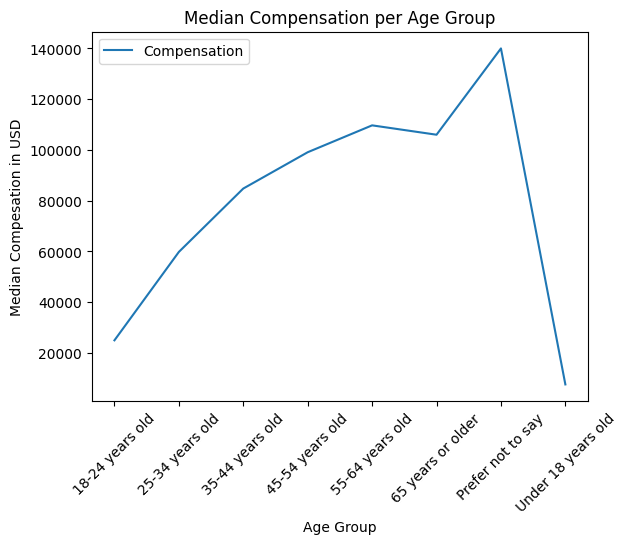

In [12]:
## Write your code here
df2.plot.line(
    x = 'AgeGroup',
    y = 'Compensation'
)
plt.xticks(rotation = 45)
plt.title('Median Compensation per Age Group')
plt.ylabel('Median Compesation in USD')
plt.xlabel('Age Group')
plt.show()

##### 2. Line Chart of Median `ConvertedCompYearly` for Ages 25 to 45


For a closer look, plot a line chart focusing on the median compensation for respondents between ages 25 and 45.


In [13]:
## Write your code here
mid = ['25-34 years old', '35-44 years old']
mid_career = df2[df2['AgeGroup'].isin(mid)]
mid_career.head()

,AgeGroup,Compensation
4,25-34 years old,59825.0
1,35-44 years old,84796.0


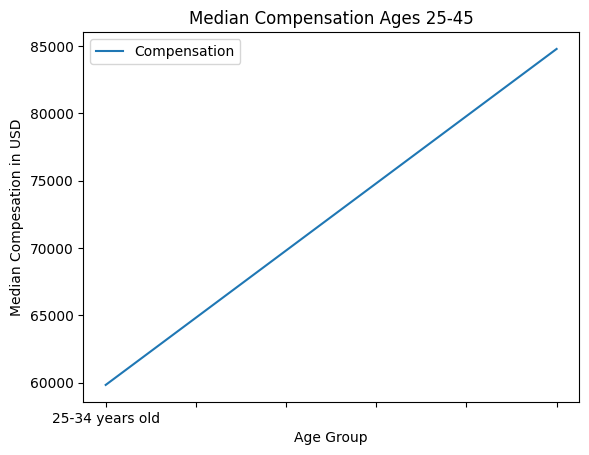

In [14]:
mid_career.plot.line(
    x = 'AgeGroup',
    y = 'Compensation'
)

plt.title('Median Compensation Ages 25-45')
plt.ylabel('Median Compesation in USD')
plt.xlabel('Age Group')
plt.show()


### Task 2: Trends in Job Satisfaction by Experience Level



##### 1. Line Chart of Job Satisfaction (`JobSatPoints_6`) by Experience Level



- Use a column that approximates experience level to analyze how job satisfaction changes with experience.

- If needed, substitute an available experience-related column for `Experience`.


In [15]:
## Write your code here
df = df.dropna(subset=['WorkExp'])
df['WorkExp'].value_counts()

WorkExp
3.0     2144
5.0     2050
10.0    2029
2.0     1885
4.0     1767
6.0     1600
7.0     1581
8.0     1554
1.0     1461
15.0    1250
12.0    1249
20.0    1074
9.0      982
11.0     823
25.0     794
13.0     740
14.0     655
16.0     600
17.0     596
18.0     587
30.0     461
24.0     382
19.0     330
22.0     323
23.0     269
26.0     254
21.0     251
27.0     217
35.0     217
28.0     210
0.0      192
40.0     139
29.0     117
32.0     101
33.0      90
36.0      89
34.0      84
31.0      83
37.0      60
38.0      55
50.0      53
42.0      47
45.0      46
39.0      37
41.0      36
43.0      34
44.0      32
46.0      12
48.0       7
47.0       5
49.0       4
Name: count, dtype: int64

In [16]:
##creating the lists of the arguments for the pd.cut() method
Bins = [0,5,10,20, np.inf]
Labels = ['Beginner', 'Mid-Level', 'Senior', 'Veteran']
df['WorkExp_Bins'] =pd.cut(df['WorkExp'], 
		bins = Bins, 
		labels = Labels,
		right = False #meaning I’m not including bin edges in the previous bin
		)
df['WorkExp_Bins'].value_counts()

WorkExp_Bins
Senior       8859
Mid-Level    7767
Beginner     7449
Veteran      5583
Name: count, dtype: int64

In [17]:
rating_list = []
for exp in Labels:
    new_df = df[df['WorkExp_Bins'] == exp]
    mean =  new_df['JobSat'].mean()
    rating_list.append(mean)

print(rating_list)

[np.float64(6.66892452308543), np.float64(6.853073067792139), np.float64(7.0449464100495565), np.float64(7.243346700692673)]


In [18]:
ratings_dict = {}
i = 0
for exp in Labels:
    ratings_dict[exp]=rating_list[i]
    i +=1

ratings_dict

df3 = pd.DataFrame(list(ratings_dict.items()), columns=['WorkExp_Bins', 'JobSat'])
df3 = df3.sort_values(by = 'WorkExp_Bins')
df3


,WorkExp_Bins,JobSat
0,Beginner,6.668925
1,Mid-Level,6.853073
2,Senior,7.044946
3,Veteran,7.243347


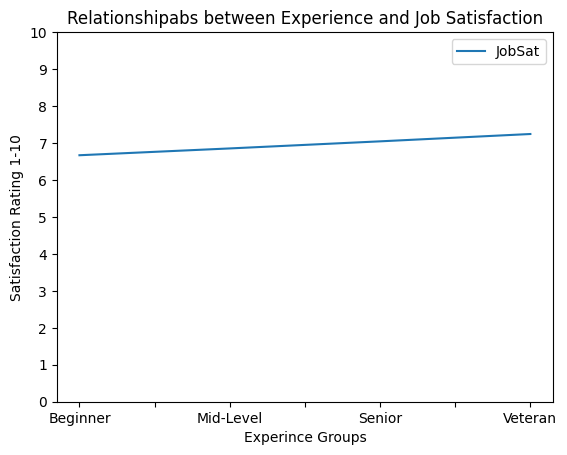

In [19]:
df3.plot.line(
    x= 'WorkExp_Bins',
    y = 'JobSat')
plt.title('Relationshipabs between Experience and Job Satisfaction')
plt.ylabel('Satisfaction Rating 1-10')
plt.yticks(range(0, 11, 1))
plt.xlabel('Experince Groups')
plt.show()


### Task 3: Trends in Job Satisfaction and Compensation by Experience


##### 1.Line Chart of Median ConvertedCompYearly Over Experience Level

- This line chart will track how median compensation (`ConvertedCompYearly`) changes with increasing experience.

- Use a column such as `WorkExp` or another relevant experience-related column.


In [21]:

comp_list2 = []
for exp in Labels:
    new_df = df[df['WorkExp_Bins'] == exp]
    median =  new_df['ConvertedCompYearly'].median()
    comp_list2.append(median)

print(comp_list2)

[np.float64(32222.0), np.float64(61222.0), np.float64(85000.0), np.float64(104360.0)]


In [22]:
comp_dict2 = {}
i = 0
for exp in Labels:
    comp_dict2[exp]=comp_list2[i]
    i +=1

comp_dict2

{'Beginner': np.float64(32222.0),
 'Mid-Level': np.float64(61222.0),
 'Senior': np.float64(85000.0),
 'Veteran': np.float64(104360.0)}

In [23]:
df4 = pd.DataFrame(list(comp_dict2.items()), columns=['WorkExp_Bins', 'ConvertedCompYearly'])
df4 = df4.sort_values(by = 'WorkExp_Bins')
df4

,WorkExp_Bins,ConvertedCompYearly
0,Beginner,32222.0
1,Mid-Level,61222.0
2,Senior,85000.0
3,Veteran,104360.0


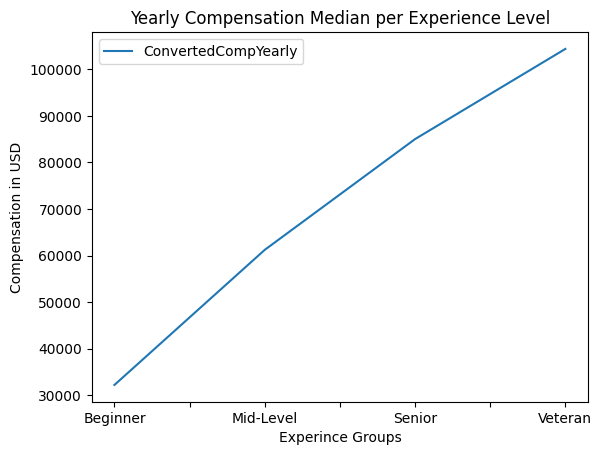

In [25]:
df4.plot.line(
    x= 'WorkExp_Bins',
    y = 'ConvertedCompYearly')
plt.title('Yearly Compensation Median per Experience Level')
plt.ylabel('Compensation in USD')
plt.xlabel('Experince Groups')
plt.show()


##### 2.Line Chart of Job Satisfaction (`JobSatPoints_6`) Across Experience Levels

- Create a line chart to explore trends in job satisfaction (`JobSatPoints_6`) based on experience level.

- This chart will provide insight into how satisfaction correlates with experience over time


In [27]:
## Write your code here
rating_list = []
for exp in Labels:
    new_df = df[df['WorkExp_Bins'] == exp]
    mean =  new_df['JobSatPoints_6'].mean()
    rating_list.append(mean)

print(rating_list)

[np.float64(26.302470363809785), np.float64(25.801174781360135), np.float64(23.650549828178693), np.float64(21.259831460674157)]


In [28]:
ratings_dict = {}
i = 0
for exp in Labels:
    ratings_dict[exp]=rating_list[i]
    i +=1

ratings_dict

df5 = pd.DataFrame(list(ratings_dict.items()), columns=['WorkExp_Bins', 'JobSatPoints_6'])
df5 = df5.sort_values(by = 'WorkExp_Bins')
df5


,WorkExp_Bins,JobSatPoints_6
0,Beginner,26.302470
1,Mid-Level,25.801175
2,Senior,23.650550
3,Veteran,21.259831


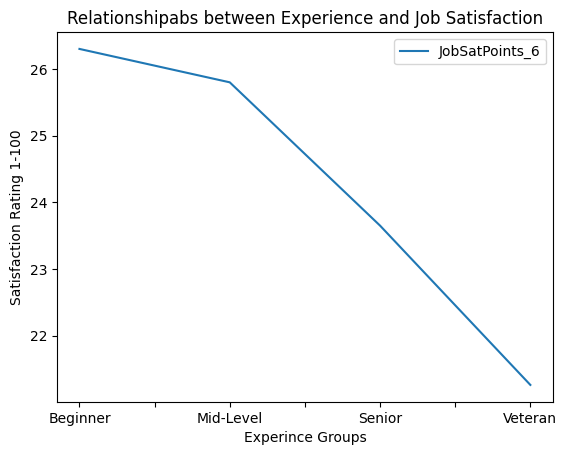

In [30]:
df5.plot.line(
    x= 'WorkExp_Bins',
    y = 'JobSatPoints_6')
plt.title('Relationshipabs between Experience and mean Job Satisfaction')
plt.ylabel('Satisfaction Rating 1-100')
plt.xlabel('Experince Groups')
plt.show()


#### Final Step: Review


In this lab, you focused on analyzing trends in compensation and job satisfaction, specifically exploring how these metrics change with age and experience levels using line charts.


### Summary


In this lab, you explored essential data visualization techniques with a focus on analyzing trends using line charts. You learned to:

- Visualize the distribution of compensation across age groups to understand salary trends.

- Track changes in median compensation over various experience levels, identifying how earnings progress with experience.

- Examine trends in job satisfaction by experience, revealing how satisfaction varies throughout a developer's career.

These analyses allow for a deeper understanding of how factors like age and experience influence job satisfaction and compensation. By using line charts, you gained insights into continuous data patterns, which are invaluable for interpreting professional trends in the developer community.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
